# Gradient Descent 

Gradient Descent is an iterative optimization algorithm used to find the minimum of a function. It is widely used in machine learning and artificial intelligence to update the parameters of a model to minimize the loss function.

The idea behind gradient descent is to take steps in the direction of the negative gradient of the function, which indicates the direction of steepest descent. The size of each step is determined by the learning rate, which controls the rate at which the algorithm converges.

There are three variants of gradient descent: batch gradient descent, stochastic gradient descent, and mini-batch gradient descent. Batch gradient descent computes the gradient of the entire dataset, while stochastic gradient descent computes the gradient of a single example at a time. Mini-batch gradient descent computes the gradient of a small batch of examples.

Gradient descent can be susceptible to getting stuck in local minima, so advanced techniques like momentum, AdaGrad, RMSProp, and Adam are often used to improve convergence and prevent overshooting.

Overall, gradient descent is a powerful optimization algorithm that is essential for training machine learning models.

**Modules Used**
* Numpy 
* Pandas 
* Sklearn

**Note**
* Pandas was only used to import the dataset
* Sklearn was only used to validate the build 
* This is the [dataset](https://github.com/VikParuchuri/zero_to_gpt/blob/master/data/clean_weather.csv) used 

Lets try to make our own Gradient Descent here 

In [130]:
import numpy as np 
import pandas as pd 

Lets assume we dataset like this 

In [131]:
data = pd.read_csv("/content/clean_weather.csv")

In [132]:
data

,Unnamed: 0,tmax,tmin,rain,tmax_tomorrow
0,1970-01-01,60.0,35.0,0.0,52.0
1,1970-01-02,52.0,39.0,0.0,52.0
2,1970-01-03,52.0,35.0,0.0,53.0
3,1970-01-04,53.0,36.0,0.0,52.0
4,1970-01-05,52.0,35.0,0.0,50.0
...,...,...,...,...,...
13504,2022-11-22,62.0,35.0,0.0,67.0
13505,2022-11-23,67.0,38.0,0.0,66.0
13506,2022-11-24,66.0,41.0,0.0,70.0
13507,2022-11-25,70.0,39.0,0.0,62.0


Lets focus on the columns from the dataset `tmax` and `tmax_tomorrow`

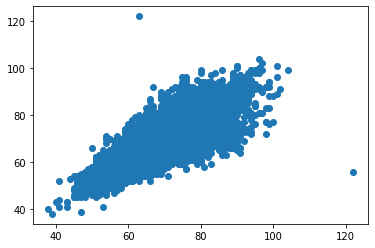

In [133]:
import matplotlib.pyplot as plt
plt.scatter(data["tmax"] , data["tmax_tomorrow"])

Lets fill null values, if there are any 

In [134]:
for i in data.columns:
    if data[i].isnull().values.any():
        data[i].fillna(value = data[i].mean() , axis = 0 , inplace = True)

For testing lets fit on a `Linear Regression` model

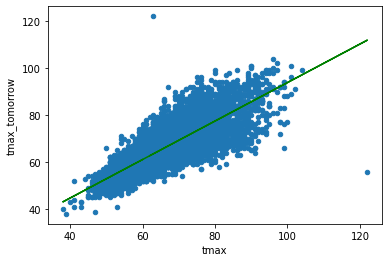

In [135]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data[["tmax"]] , data[["tmax_tomorrow"]])
data.plot.scatter("tmax" , "tmax_tomorrow")
plt.plot(data["tmax"] , lr.predict(data[["tmax"]]) , "green")

Lets find the `coefficient` and the `intercept` of the line

In [136]:
print(lr.coef_[0])
print(lr.intercept_)

[0.81804211]
[12.01902081]


Lets calcualte some loss

In [137]:
loss = lambda w , y : ((w * 80 + 11.99) - y) ** 2

Lets assume we have a list of weights 

In [138]:
y = 81
ws = np.arange(-1 , 3 , .1)

Lets calculate loss on these weights

In [139]:
losses = loss(ws , y)

In [140]:
losses

array([2.22039801e+04, 1.98838201e+04, 1.76916601e+04, 1.56275001e+04,
       1.36913401e+04, 1.18831801e+04, 1.02030201e+04, 8.65086010e+03,
       7.22670010e+03, 5.93054010e+03, 4.76238010e+03, 3.72222010e+03,
       2.81006010e+03, 2.02590010e+03, 1.36974010e+03, 8.41580100e+02,
       4.41420100e+02, 1.69260100e+02, 2.51001000e+01, 8.94010000e+00,
       1.20780100e+02, 3.60620100e+02, 7.28460100e+02, 1.22430010e+03,
       1.84814010e+03, 2.59998010e+03, 3.47982010e+03, 4.48766010e+03,
       5.62350010e+03, 6.88734010e+03, 8.27918010e+03, 9.79902010e+03,
       1.14468601e+04, 1.32227001e+04, 1.51265401e+04, 1.71583801e+04,
       1.93182201e+04, 2.16060601e+04, 2.40219001e+04, 2.65657401e+04])

Lets plot this on a graph

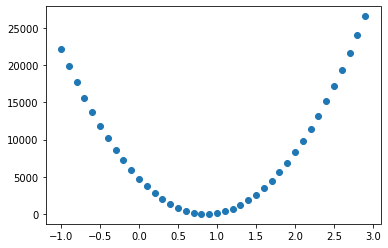

In [141]:
import matplotlib.pyplot as plt
plt.scatter(ws , losses)

Lets now create a gradient function that stores the slope of this curve at different points

In [142]:
gradient = lambda w ,y : ((w * 80 + 11.99) - y) * 2

In [143]:
grad = gradient(ws , y)

In [144]:
grad

array([-298.02, -282.02, -266.02, -250.02, -234.02, -218.02, -202.02,
       -186.02, -170.02, -154.02, -138.02, -122.02, -106.02,  -90.02,
        -74.02,  -58.02,  -42.02,  -26.02,  -10.02,    5.98,   21.98,
         37.98,   53.98,   69.98,   85.98,  101.98,  117.98,  133.98,
        149.98,  165.98,  181.98,  197.98,  213.98,  229.98,  245.98,
        261.98,  277.98,  293.98,  309.98,  325.98])

Lets try to plot these values on a graph

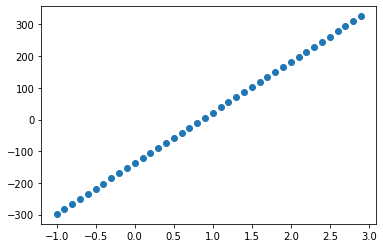

In [145]:
plt.scatter(ws , grad)

Now lets apply this gradient on our function , but here we will be take a wide range of values

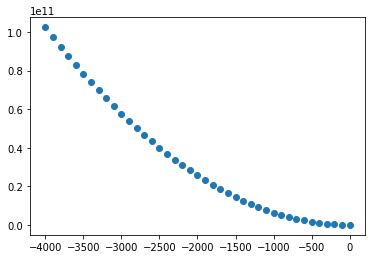

In [146]:
ws = np.arange(-4000 , 100 , 100)
losses = loss(ws , y)
plt.scatter(ws , losses)
new_weight = 1 - gradient(1 , y) * 80
plt.plot(new_weight , loss(new_weight , y) , "yellow")

Here is a problem, the gradient is reaching very fast, and thus not able to converge with the graph, lets slow this down, and for slowing this down, we need to multiply this with a constant 

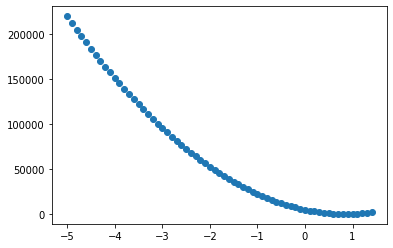

In [147]:
ws = np.arange(-5 , 1.5 , .1)
losses = loss(ws , y)

plt.scatter(ws , losses)

lr = 5e-5
new_weight = 1 - lr * gradient(1 , y) * 80

In [148]:
predictors = data.drop(["tmax_tomorrow" , "Unnamed: 0"] , axis = 1)

In [149]:
np.random.seed(0)
weights = np.random.rand(len(predictors) , 1)

In [150]:
weights

array([[0.5488135 ],
       [0.71518937],
       [0.60276338],
       ...,
       [0.5414086 ],
       [0.55774644],
       [0.65907671]])

In [151]:
baises = np.ones((1, 1))

In [152]:
baises

array([[1.]])

There are some rules that we need to remeber while analysing random `weights` 
* We cannot initialize weights with larger difference in between => After research it is found that this practice leads to vanishing gradient 
* We cannot initialize weights with smaller differene in between => After research it is found that this practice leads to vanishing gradient
* We cannot initialize values as $0$ as it will not channge the values

So it would be good if we intialize weights as same for all the features

In [153]:
import math

k = math.sqrt(1 / len(predictors))

weights = np.random.rand(len(predictors), 1) * 2 * k - k

In [154]:
np.dot(np.array(weights).T , np.array(predictors)) + np.array(baises)

array([[-14.18942183, -14.1483536 ,   0.85778739]])

Now we have our optimizer created, we just need to add some more functionality to it 

Now lets just put it in a function 

In [ ]:
class gradient_descent:
    
    def __init__(self , X , y , lr = 1e-4 , epochs = 100) : 
    
        self.X = X
        self.y = y
        self.lr = lr
        self.epochs = epochs

    def init_params(self , X , y) : 
        
        np.random.seed(0)
        k = math.sqrt
    
        weights = np.random.rand(self.X.shape[0] , 
                                 self.y.shape[0]) * 2 * k - k
    
        biases = np.ones((1 , 
                          self.y.shape[0])) * 2 * k - k
    
        return [weights , biases]
        
    def forward(self , params) : 
        
        weights , biases = params
        prediction = self.X * weights , biases
    
        return prediction

    def backward(self , params , X , lr , grad) : 
    
        weight_grad = (self.X.T / self.X.shape[0]) * grad
        bias_grad = np.mean(grad , axis = 0)

        params[0] -= weight_grad * lr
        params[1] -= bias_grad * lr

        return params 
    
    mse = lambda actual , predictions : np.mean((predictions - actual) ** 2)
    
    mse_grad = lambda actual , predictions : (actual - predictions)
    
    def fit(self , epochs):
    
        params = self.init_params(self.X.shape[1] , y.shape[1])

        for i in range(self.epochs) : 
    
            predictions = self.forward(params , self.X)
            grad = self.mse_grad(self.y , predictions)

            params = self.backward(params , self.X , self.lr , grad)